#What is Exploding Gradient?

The exploding gradient problem is a challenge encountered during training deep neural networks. It occurs when the gradients of the network's loss function with respect to the weights (parameters) become excessively large.

#Why Exploding Gradient Occurs?

The issue of exploding gradients arises when, during backpropagation, the derivatives or slopes of the neural network's layers grow progressively larger as we move backward. This is essentially the opposite of the vanishing gradient problem.

The root cause of this problem lies in the weights of the network, rather than the choice of activation function. High weight values lead to correspondingly high derivatives, causing significant deviations in new weight values from the previous ones. As a result, the gradient fails to converge and can lead to the network oscillating around local minima, making it challenging to reach the global minimum point.

In summary, exploding gradients occur when weight values lead to excessively large derivatives, making convergence difficult and potentially preventing the neural network from effectively learning and optimizing its parameters.

#How can we identify the problem?

Identifying the presence of exploding gradients in deep neural network requires careful observation and analysis during training. Here are some key indicators:

The loss function exhibits erratic behavior, oscillating wildly instead of steadily decreasing suggesting that the network weights are being updated excessively by large gradients, preventing smooth convergence.

The training process encounters "NaN" (Not a Number) values in the loss function or other intermediate calculations..

If network weights, during training exhibit significant and rapid increases in their values, it suggests the presence of exploding gradients.
Tools like TensorBoard can be used to visualize the gradients flowing through the network.

#How can we solve the issue?

Gradient Clipping: It sets a maximum threshold for the magnitude of gradients during backpropagation. Any gradient exceeding the threshold is clipped to the threshold value, preventing it from growing unbounded.
Batch Normalization: This technique normalizes the activations within each mini-batch, effectively scaling the gradients and reducing their variance. This helps prevent both vanishing and exploding gradients, improving stability and efficiency.

In [18]:
from keras.datasets import fashion_mnist

(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()

In [19]:
class_names = ['T-shirt/top',
               'Trouser',
               'Pullover',
               'Dress',
               'Coat',
               'Sandal',
               'Shirt',
               'Sneaker',
               'Bag',
               'Ankle boot']

In [20]:
y_train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [21]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)


In [22]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

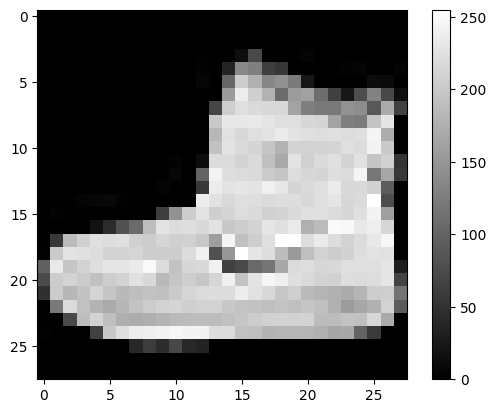

In [23]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(X_train[0], cmap='gray')
plt.colorbar()
plt.show()

In [24]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [25]:
from keras.activations import sigmoid
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten# Add this line
tf.random.set_seed(9)


from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import SGD  # Correct import for SGD

from keras.activations import relu


In [26]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='sigmoid')
])


model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,514 (435.60 KB)

 Trainable params: 111,514 (435.60 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
optimizer =SGD(learning_rate=0.01)
loss_fn = CategoricalCrossentropy()

In [28]:
batch_size = 64
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=X_train.shape[0]).batch(batch_size)

In [29]:
import numpy as np
np.random.seed(9)

new_weights = []

for weights in model.get_weights():
    if len(weights.shape) == 2:
        new_weights.append(np.random.randn(weights.shape[0], weights.shape[1]) * 100)
    else:
        new_weights.append(np.random.randn(weights.shape[0]) * 100)

model.set_weights(new_weights)

model.get_weights()[:2]

[array([[ 1.10855468e-01, -2.89544067e+01, -1.11606628e+02, ...,
          2.70807247e+01, -1.09553963e+02,  2.40134293e+02],
        [-2.79909744e+01,  2.03080078e+02, -8.19394684e+00, ...,
         -3.82227927e-01,  1.05748680e+02, -9.83664932e+01],
        [ 1.08536072e+02,  3.65864944e+01, -1.09298759e+02, ...,
         -5.81144371e+01,  4.14889984e+01,  1.60726120e+02],
        ...,
        [ 1.35224182e+02,  2.94914799e+01,  1.18652184e+02, ...,
          4.81741476e+00, -2.53905319e+02, -4.74941177e+01],
        [-3.37093697e+01,  1.03940331e+02,  1.14126289e+02, ...,
          1.74861115e+02,  4.74479866e+00,  1.33079357e+01],
        [ 2.64444885e+01, -1.50783691e+02,  1.20068794e+02, ...,
          7.30409470e+01,  9.83183594e+01,  1.32491974e+02]], dtype=float32),
 array([ -81.39623  ,   17.539917 ,  -72.668785 ,    2.2356956,
          33.181274 ,  119.915825 ,   89.62817  ,  -21.945011 ,
        -127.10773  ,   84.82333  , -114.00925  , -107.28623  ,
        -105.227394 , 

In [30]:
grad_log = []

epochs = 2

for epoch in range(epochs):
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

        with tf.GradientTape() as tape:
            preds = model(x_batch_train)

            loss_value = loss_fn(y_batch_train, preds)

            grads = tape.gradient(loss_value, model.trainable_weights)
            g_g = []

            for g_s in grads:
                if len(g_s.numpy().shape) == 2:
                    g_g.append(g_s.numpy()[0, 0])

        grad_log.append(g_g)

        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        if step % 200 == 0:
            print(f'Epoch {epoch + 1}/{epochs}', end='. ')
            print(f'Step {step}. Train loss: {loss_value}')

Epoch 1/2. Step 0. Train loss: 59955839238144.0
Epoch 1/2. Step 200. Train loss: nan
Epoch 1/2. Step 400. Train loss: nan
Epoch 1/2. Step 600. Train loss: nan
Epoch 1/2. Step 800. Train loss: nan
Epoch 2/2. Step 0. Train loss: nan
Epoch 2/2. Step 200. Train loss: nan
Epoch 2/2. Step 400. Train loss: nan
Epoch 2/2. Step 600. Train loss: nan
Epoch 2/2. Step 800. Train loss: nan


In [31]:
model.get_weights()[:2]

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, 

In [32]:
import tensorflow as tf
from tensorflow.keras import backend as K

def my_relu(x):
    return tf.keras.activations.relu(x, max_value=6)

In [33]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation=my_relu),
    Dense(64, activation=my_relu),
    Dense(32, activation=my_relu),
    Dense(16, activation=my_relu),
    Dense(10, activation='sigmoid')
])


model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,514 (435.60 KB)

 Trainable params: 111,514 (435.60 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.set_weights(new_weights)

In [35]:
optimizer = SGD(learning_rate=0.01)
loss_fn = CategoricalCrossentropy()

In [36]:
grad_log = []

epochs = 2

for epoch in range(epochs):
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

        with tf.GradientTape() as tape:
            preds = model(x_batch_train)

            loss_value = loss_fn(y_batch_train, preds)

            grads = tape.gradient(loss_value, model.trainable_weights)
            g_g = []

            for g_s in grads:
                if len(g_s.numpy().shape) == 2:
                    g_g.append(g_s.numpy()[0, 0])

        grad_log.append(g_g)

        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        if step % 200 == 0:
            print(f'Epoch {epoch + 1}/{epochs}', end='. ')
            print(f'Step {step}. Train loss: {loss_value}')

Epoch 1/2. Step 0. Train loss: 1280.24609375
Epoch 1/2. Step 200. Train loss: 1870.443359375
Epoch 1/2. Step 400. Train loss: 1572.2493896484375
Epoch 1/2. Step 600. Train loss: 1763.6461181640625
Epoch 1/2. Step 800. Train loss: 1447.853271484375
Epoch 2/2. Step 0. Train loss: 1542.637939453125
Epoch 2/2. Step 200. Train loss: 1290.0576171875
Epoch 2/2. Step 400. Train loss: 1281.2095947265625
Epoch 2/2. Step 600. Train loss: 1168.430419921875
Epoch 2/2. Step 800. Train loss: 890.1512451171875


In [37]:
model.get_weights()[:2]

[array([[ 1.10855468e-01, -2.89544067e+01, -1.11606628e+02, ...,
          2.70807247e+01, -1.09553963e+02,  2.40134293e+02],
        [-2.79909744e+01,  2.03080078e+02, -8.19394684e+00, ...,
         -3.82227927e-01,  1.05748680e+02, -9.83664932e+01],
        [ 1.08536072e+02,  3.65864944e+01, -1.09298759e+02, ...,
         -5.81144371e+01,  4.14889984e+01,  1.60726120e+02],
        ...,
        [ 1.35224182e+02,  2.94914799e+01,  1.18652184e+02, ...,
          4.81741476e+00, -2.53905319e+02, -4.74941177e+01],
        [-3.37093697e+01,  1.03940331e+02,  1.14126289e+02, ...,
          1.74861115e+02,  4.74479866e+00,  1.33079357e+01],
        [ 2.64444885e+01, -1.50783691e+02,  1.20068794e+02, ...,
          7.30409470e+01,  9.83183594e+01,  1.32491974e+02]], dtype=float32),
 array([ -81.39623  ,   17.539917 ,  -72.668785 ,    2.2356956,
          33.181274 ,  119.915825 ,   89.62817  ,  -21.945011 ,
        -127.10773  ,   84.82333  , -114.00925  , -107.28623  ,
        -105.227394 , 